# Анализ бизнес-показателей Procrastinate Pro+

В нашем распоряжении есть лог сервера с данными о посещениях развлекательного приложения Procrastinate Pro+ новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации.


## Изучение данных

In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import time
from datetime import datetime
from datetime import date, timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
visits = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/business_metrics_analysis/visits_info_short.csv')
orders = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/business_metrics_analysis/orders_info_short.csv')
costs = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/business_metrics_analysis/costs_info_short.csv')

In [3]:
def info (data): #функция для просмотра иформации об имеющихсся данных
    data.info()
    display(data.head())
    print(data.columns)
    display(pd.DataFrame(round((data.isna().mean() * 100), 2), columns=['NaNs,%']).style.format('{:.2f}'))

### visits

In [4]:
info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')


,"NaNs,%"
User Id,0.00
Region,0.00
Device,0.00
Channel,0.00
Session Start,0.00
Session End,0.00


Таблица `visits` (лог сервера с информацией о посещениях сайта):  
`User Id` — уникальный идентификатор пользователя  
`Device` — категория устройства пользователя  
`Session start` — дата и время начала сессии  
`Session End` — дата и время окончания сессии  
`Channel` — идентификатор рекламного источника, из которого пришел пользователь  
`Region` - страна пользователя

- [ ]  названия столбцов необходимо привести в соотвествие с правилами стиля
- [x]  пропусков нет
- [ ]  типы данных не ок, позже приведем в норму столбцы с датой

### orders

In [5]:
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')


,"NaNs,%"
User Id,0.00
Event Dt,0.00
Revenue,0.00


Таблица `orders` (информация о заказах):  
`User Id` — уникальный id пользователя, который сделал заказ  
`Event Dt` — дата и время покупки  
`Revenue` — выручка  

- [ ]  названия столбцов необходимо привести в соотвествие с правилами стиля
- [x]  пропусков нет
- [ ]  типы данных не ок, позже приведем в норму столбцы с датой

### costs

In [6]:
info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Index(['dt', 'Channel', 'costs'], dtype='object')


,"NaNs,%"
dt,0.00
Channel,0.00
costs,0.00


Таблица `costs` (информация о затратах на маркетинг):     
    `Channel` — идентификатор рекламного источника  
    `Dt` — дата  
    `Costs` — затраты на этот рекламный источник в этот день  

### Вывод

<div style="border:solid SandyBrown 2px; padding: 20px">
Выявленные проблемы:

Необходимо сменить типы данных во всех столбцах с датами, и переименовать все столбцы в соотвествии с snake_case
Необходимо устранить выявленные проблемы, а также подробнее посмотреть на значения в таблицах для устранения возможных дубликатов и аномалий в данных.

## Предобработка данных

Приведем названия столбцов к корректному виду:

In [7]:
columns = []
for i in [costs, orders, visits]:
    for c in i.columns:
        columns.append(c.lower().replace(' ','_'))
    i.columns = columns
    columns.clear()
    print(i.columns)

Index(['dt', 'channel', 'costs'], dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')


Напишем функцию приведения к типу даты, а также посмотрми внимательнее на данные.

In [8]:
def preprocessing (data, column1, column2 = 0):  
    data[column1] = pd.to_datetime(data[column1])
    try:
        data[column2] = pd.to_datetime(data[column2])
    except:
        pass
    for column in data.columns:
        print(data[column].describe(), end='\n\n\n')
    print('Дубликатов строк', data.duplicated().sum())

In [9]:
preprocessing(costs, 'dt')

count                    1800
unique                    180
top       2019-05-01 00:00:00
freq                       10
first     2019-05-01 00:00:00
last      2019-10-27 00:00:00
Name: dt, dtype: object


count         1800
unique          10
top       FaceBoom
freq           180
Name: channel, dtype: object


count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64


Дубликатов строк 0


In [10]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Уникальные значения каналов привлечения дейтвительно уникальные, все ок. Траты на рекламу тоже выглядят правдоподобно, нет отрицательных и даже нулевых.

In [11]:
preprocessing(orders, 'event_dt')

count    4.021200e+04
mean     4.990295e+11
std      2.860937e+11
min      5.993260e+05
25%      2.511324e+11
50%      4.982840e+11
75%      7.433327e+11
max      9.998954e+11
Name: user_id, dtype: float64


count                   40212
unique                  40163
top       2019-10-26 06:49:22
freq                        2
first     2019-05-01 00:28:11
last      2019-10-31 23:56:56
Name: event_dt, dtype: object


count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64


Дубликатов строк 0


user_id также приведем к типу int тк там точно нет дробных значений.

In [12]:
orders['user_id'] = orders['user_id'].astype('int')

<AxesSubplot:>

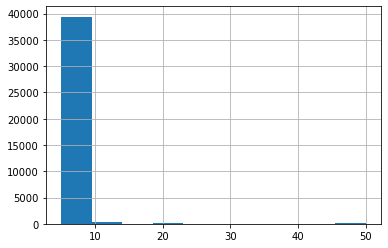

In [13]:
orders['revenue'].hist(bins=10) #смотрим распределение выручки

По распределению и гистограмме видно, что медиана выручки от заказов сотавляет 4,99. Можно предположить, что это плата за подписку на данное приложение, либо какая-то крайне популярная фича, которая нужна бОльшей части пользователей. В целом распределение выглядит адекватно, хоть и есть выброс в 49,99$, трогать его в условиях данной задачи не будем.

In [14]:
preprocessing(visits, 'session_start', 'session_end')

count    3.099010e+05
mean     4.997664e+11
std      2.887899e+11
min      5.993260e+05
25%      2.493691e+11
50%      4.989906e+11
75%      7.495211e+11
max      9.999996e+11
Name: user_id, dtype: float64


count            309901
unique                4
top       United States
freq             207327
Name: region, dtype: object


count     309901
unique         4
top       iPhone
freq      112603
Name: device, dtype: object


count      309901
unique         11
top       organic
freq       107760
Name: channel, dtype: object


count                  309901
unique                 306813
top       2019-06-27 14:56:41
freq                        3
first     2019-05-01 00:00:41
last      2019-10-31 23:59:23
Name: session_start, dtype: object


count                  309901
unique                 306793
top       2019-07-16 02:23:30
freq                        3
first     2019-05-01 00:07:06
last      2019-11-01 01:38:46
Name: session_end, dtype: object


Дубликатов строк 0


In [15]:
visits['user_id'] = visits['user_id'].astype('int') #user_id также приведем к типу int тк там точно нет дробных значений

In [16]:
for c in ['region', 'channel', 'device']:
    print(visits[c].unique())

['United States' 'UK' 'France' 'Germany']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
['iPhone' 'Mac' 'Android' 'PC']


Проверка уникальных значений в столбцах показывает, что неявных дубликтов нет.

<div style="border:solid SandyBrown 2px; padding: 20px">
    
**Вывод**:
В результате предобработки не было обнаружено дубликатов или каких-либо очевидных ошибок в данных. Все типы данных приведены к максимально удобным. Названия столбцов соотвествуют общепринятому стилю.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

Функция для расчета **LTV и ROI**

Сразу определим момент анализа - 01.11.2019, а горизонт анализа 14 дней:

In [17]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функция сглаживания фрейма с заданным окном:

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для визуализации **LTV и ROI**:

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
 
    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для расчета **удержания**:

In [21]:
# функции get_retention(), get_conversion(), get_profiles() из предыдущих уроков

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Функция для визуализации **удержания**:

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Функция для расчета **конверсии**:

In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для визуализации **конверсии**:

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Создание профиля пользователя и определение дат

Для создания пользовательских профилей с датой первого посещения и источником перехода в приложение напишем функцию get_profiles(). В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию first():

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [26]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,-2147409877,2019-06-16 08:42:58,organic,PC,UK,2019-06-16,2019-06-01,True,0.000000
1,-2147375740,2019-05-29 20:03:52,FaceBoom,Android,United States,2019-05-29,2019-05-01,False,1.114474
2,-2147362870,2019-08-15 01:45:41,organic,iPhone,United States,2019-08-15,2019-08-01,False,0.000000
3,-2147310616,2019-08-12 10:58:20,organic,Mac,United States,2019-08-12,2019-08-01,False,0.000000
4,-2147294564,2019-05-25 13:25:52,RocketSuperAds,iPhone,United States,2019-05-25,2019-05-01,False,0.544186
...,...,...,...,...,...,...,...,...,...
150002,2147307983,2019-10-21 03:55:02,FaceBoom,PC,United States,2019-10-21,2019-10-01,False,1.094022
150003,2147308981,2019-05-21 21:28:26,organic,Mac,United States,2019-05-21,2019-05-01,False,0.000000
150004,2147365775,2019-08-23 21:45:08,MediaTornado,iPhone,United States,2019-08-23,2019-08-01,False,0.220000
150005,2147367518,2019-05-06 23:34:47,FaceBoom,iPhone,United States,2019-05-06,2019-05-01,False,1.110280


Результат — 150 008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить приложение. 

По условию у нас данные о пользователях, зарегистрированных в период с 2019-05-01 по 2019-10-27, проверим макисмальную и минимальную дату привлечения пользователей.

In [27]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [28]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Напишем функцию, которая пригодится нам в дальнейшем для исследования различных факторов, а именно количество привлеченных и платящих пользователей в зависимости от них:

In [29]:
def exp_factor(factor, ax1):
    
    data = profiles.groupby(factor).agg({'user_id': 'nunique'})
    data.columns = ['all_users']
    data['payer'] =  profiles.query('payer==True').groupby(factor).agg({'user_id': 'nunique'})
    data['percent'] = round(data['payer']/data['all_users']*100, 1)
    data['fraction'] = round(data['payer']/data['payer'].sum()*100, 1)
    
    # строим круговую диаграмму по доле покупателей
    fig, ax = plt.subplots(figsize=(19, 8))
    data['fraction'].plot(kind='pie', cmap="Blues", legend=True, autopct='%.0f%%')
    plt.title(f'Доля платящих пользователей в зависимости от {ax1}')
    ax.set_ylabel(None);
    
    data = data.reset_index()
    data = data.sort_values(by='all_users', ascending=False)
    display(data) # выводим общую таблицу

    #строим диаграммы по общему числу покупателей и относительному показателю платящих из общего числа привлеченных
    for column in ['all_users','payer','percent']:
        pal = sns.color_palette("light:#124683")
        plt.figure(figsize=(19, 7))
        sns.barplot(data= data.sort_values(by=column, ascending=False), x=factor, y=column, palette=pal)
        plt.xlabel(ax1)
        plt.ylabel('Привлеченных пользователей')
        plt.title(f'Распределение пользователей по {ax1} {column}');

### Исследование рекламных каналов

Посмотрим по каким рекламным каналам шло привлечение пользователей и какие каналы приносят больше всего платящих пользователей:

,channel,all_users,payer,percent,fraction
10,organic,56439,1160,2.1,13.1
1,FaceBoom,29144,3557,12.2,40.1
6,TipTop,19561,1878,9.6,21.1
4,OppleCreativeMedia,8605,233,2.7,2.6
2,LeapBob,8553,262,3.1,3.0
7,WahooNetBanner,8552,453,5.3,5.1
5,RocketSuperAds,4448,352,7.9,4.0
3,MediaTornado,4364,156,3.6,1.8
8,YRabbit,4312,165,3.8,1.9
0,AdNonSense,3880,440,11.3,5.0


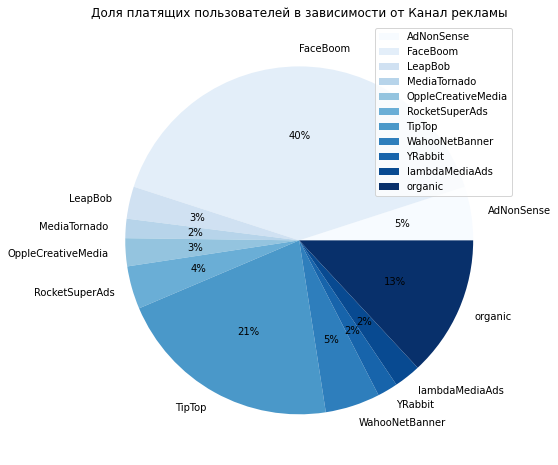

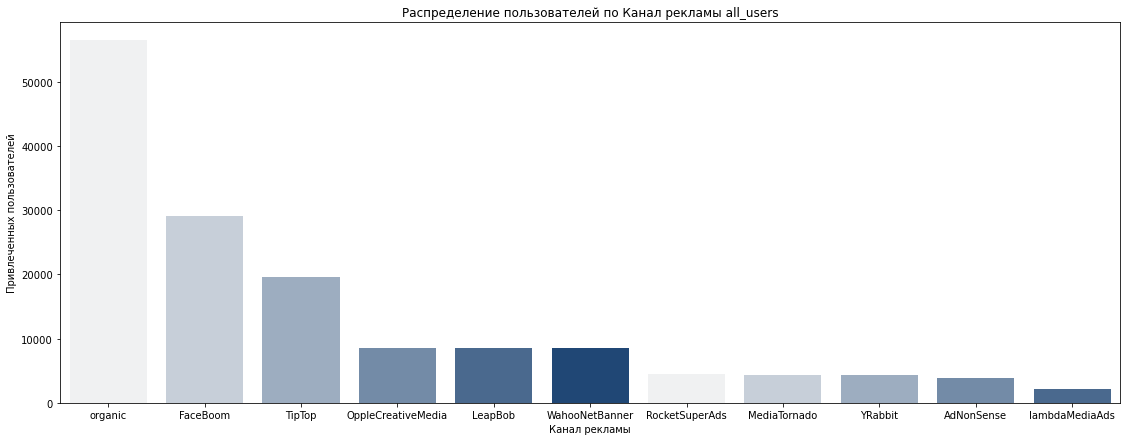

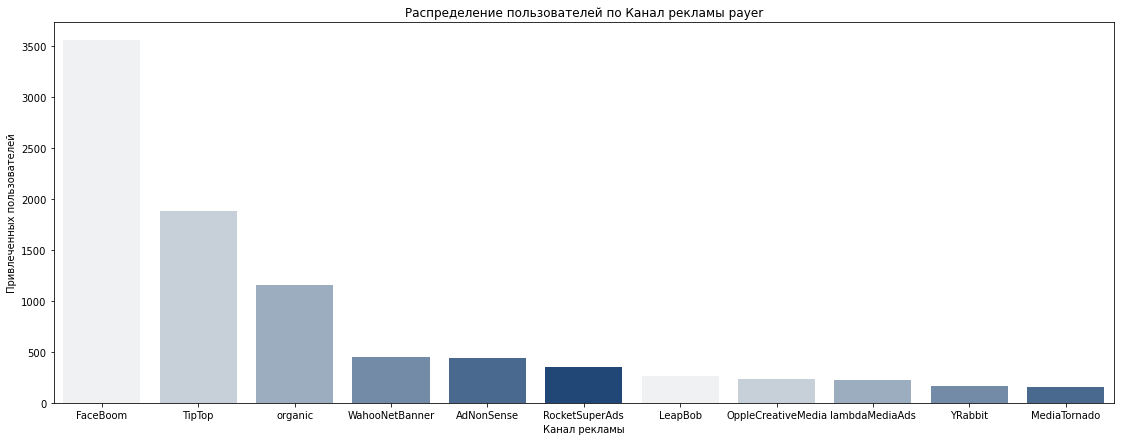

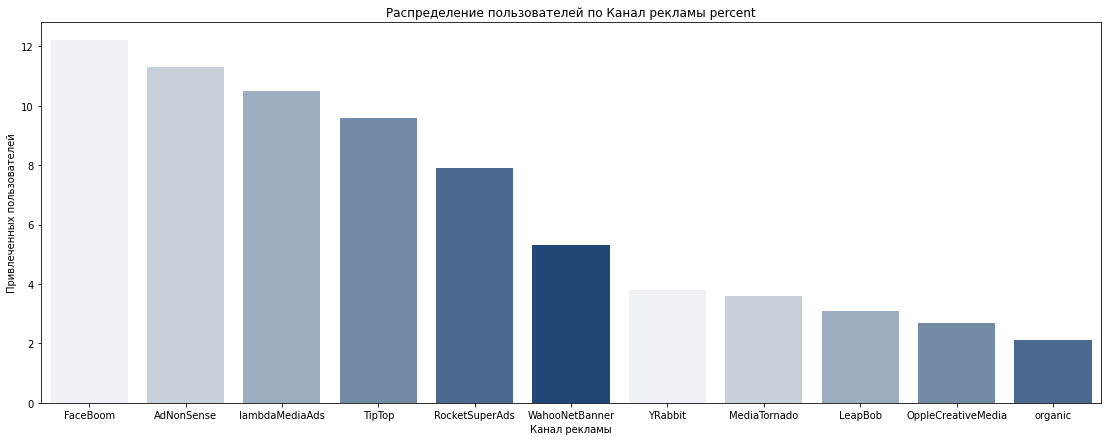

In [30]:
exp_factor('channel', 'Канал рекламы')

Итого, что видим:
* канал organic привел в приложение больше всего пользователей, те больше всего пользователей нашли приложение сами, без какой-либо рекламы
* в то же время из них было меньше всего платящих, всего 2,1%
* среди остальных источников лидирует FaceBoom, как в абсолютном количестве привлеченных пользователей, так и в абсолютном и относительном показателе привлеченных платящих пользователей
* среди наименее выгодных по количеству платящих пользователей каналы - OppleCreativeMedi, LeapBob и MediaTornado
* маленькие, но удаленькие это AdNonSense и lambdaMediaAds - привлекли меньше всего пользователей, но из них самые большие показатели платежности.

Посмотрим дополнительно динамику привлечения новых пользоватаелей в течение времени по некоторым каналам(условно лучшим и худшим).

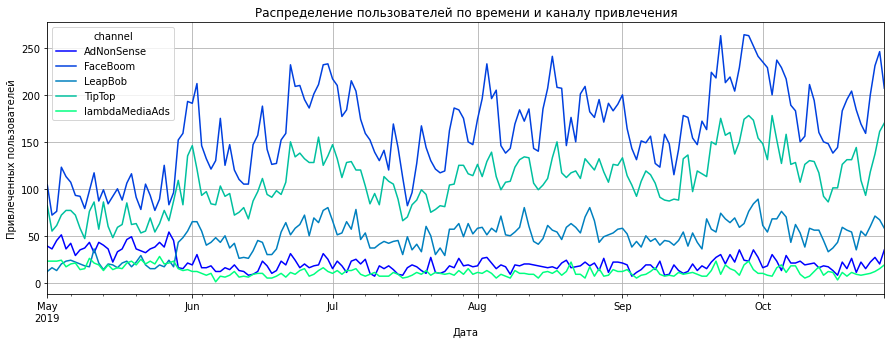

In [31]:
channel_list = ['FaceBoom', 'TipTop', 'AdNonSense', 'lambdaMediaAds', 'OppleCreativeMedi', 'LeapBob']
profiles.query('channel in @channel_list').pivot_table(index='dt', 
                                               columns='channel', 
                                               values='user_id', 
                                               aggfunc='nunique').plot(figsize=(15, 5), grid=True, colormap="winter");
plt.xlabel('Дата')
plt.ylabel('Привлеченных пользователей')
plt.title(f'Распределение пользователей по времени и каналу привлечения');

По графику видно, что в начале исследуемого периода разница между количеством привлеченных пользователей была не так выражена, но к октябрю разница стала очень ощутимой. Возможно, аудитория каналов AdNonSense и lambdaMediaAds "исчерпала себя". Если это реклама в каких-то сторонних приложениях, то такая динамика может объясняться тем, что аудитория самих приложений не растет или растет крайне медленно. А вот FaceBoom стабильно растет, пожалуй, можно прогнозировать в ближайшее время продолжающийся рост привлеченной аудитории.

### Исследование регионов посетителей приложежния

,region,all_users,payer,percent,fraction
3,United States,100002,6902,6.9,77.7
2,UK,17575,700,4.0,7.9
0,France,17450,663,3.8,7.5
1,Germany,14980,616,4.1,6.9


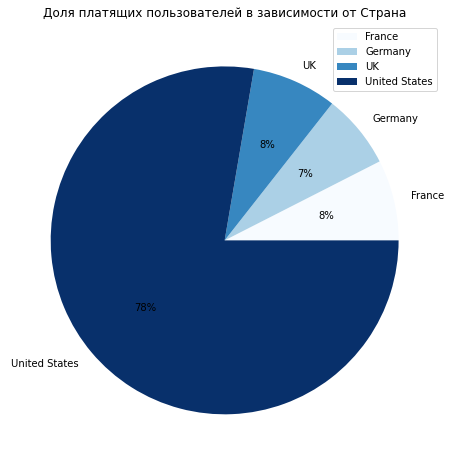

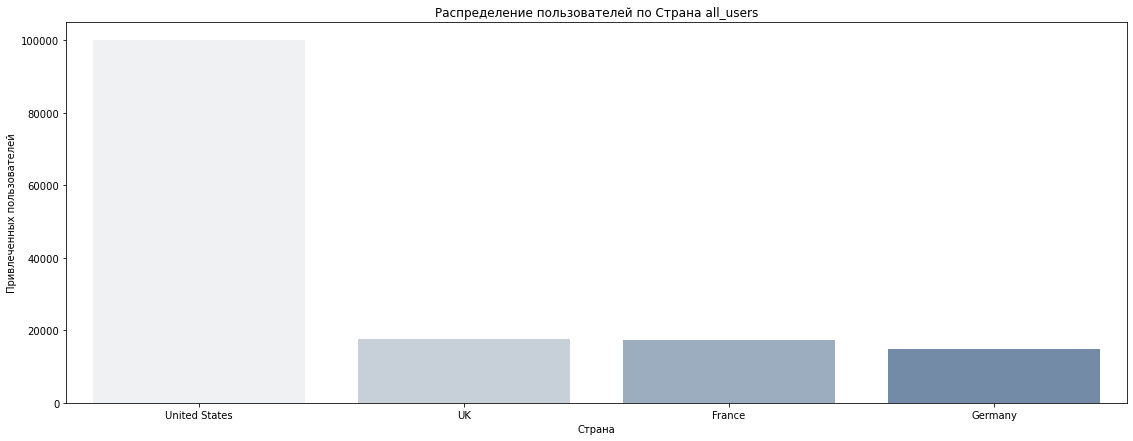

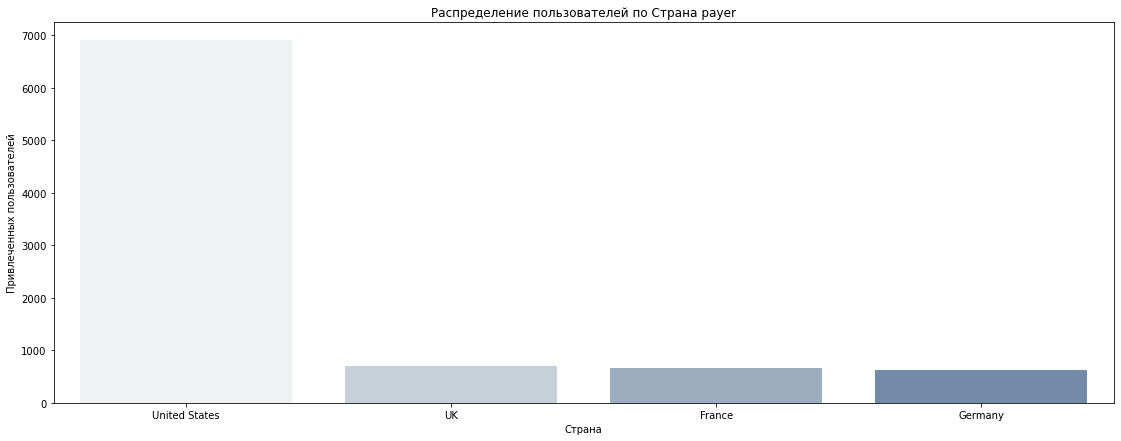

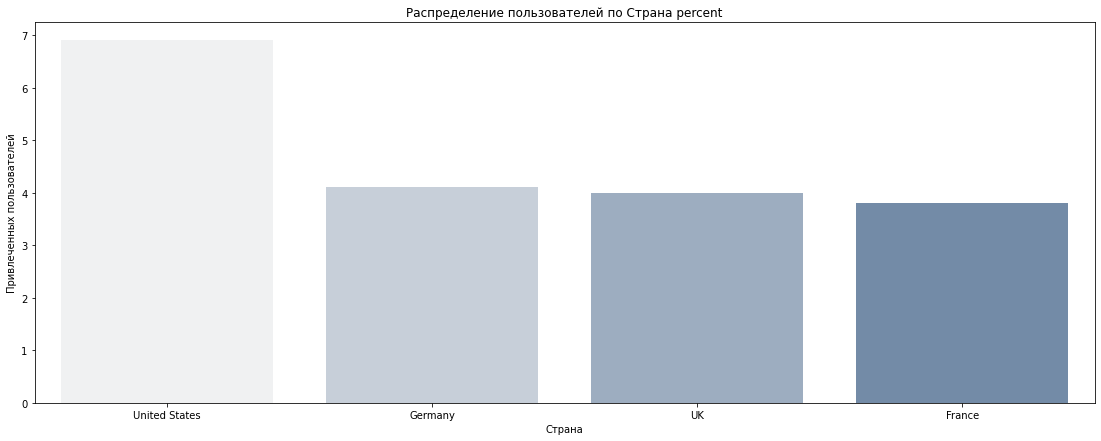

In [32]:
exp_factor('region', 'Страна')

Итого, что видим:
* среди стран лидирует США, как в абсолютном количестве привлеченных пользователей, так и в абсолютном и относительном показателе привлеченных платящих пользователей
* среди остальных - Франция, Великобритания и Германия занимают примерно одинаковое положение, около 4% пользователей из этих стран конвертируются в покупателей.

### Исследование устройств посетителей приложежния

,device,all_users,payer,percent,fraction
3,iPhone,54479,3382,6.2,38.1
0,Android,35031,2050,5.9,23.1
2,PC,30455,1537,5.0,17.3
1,Mac,30042,1912,6.4,21.5


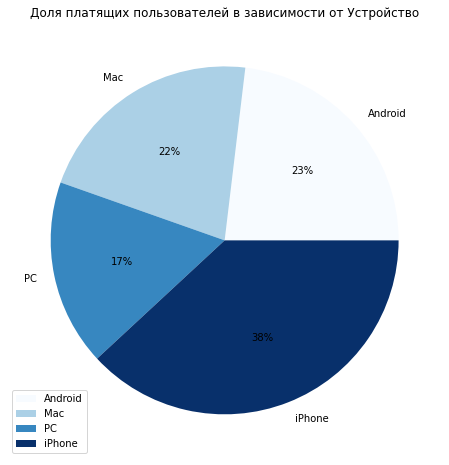

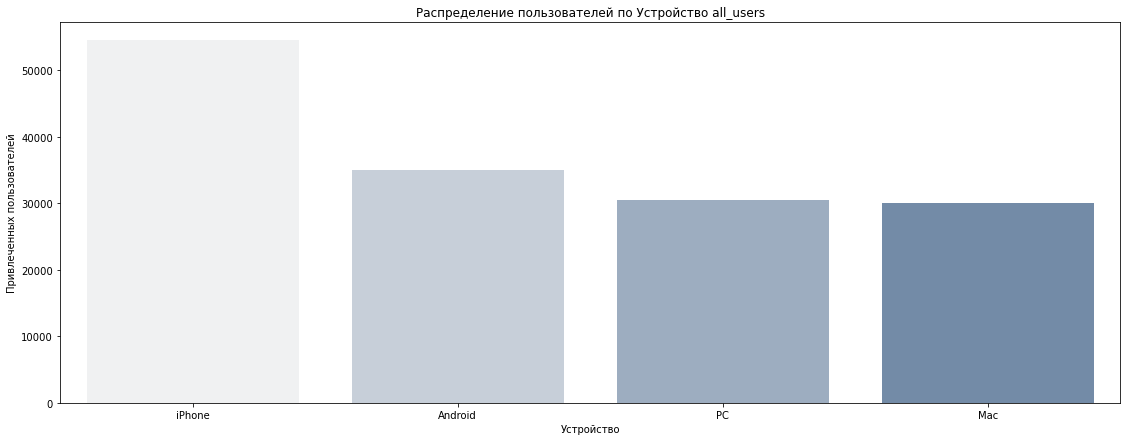

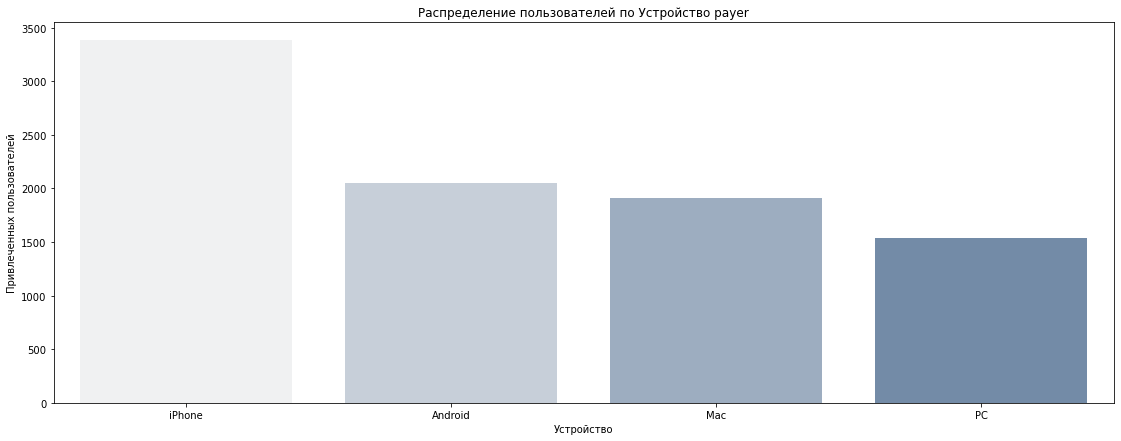

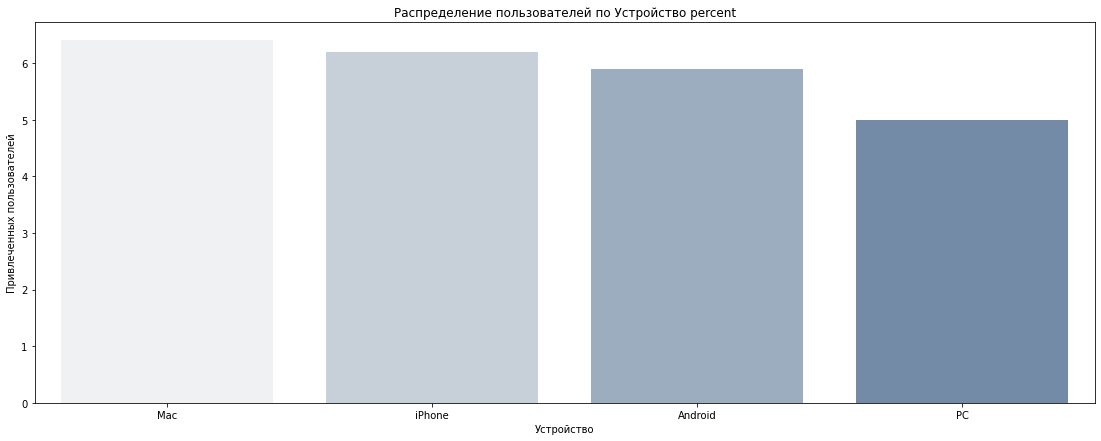

In [33]:
exp_factor('device', 'Устройство')

Итого, что видим:
* среди устройств наибольшую долю от общего числа платящих пользовтаелей составляют пользовтаели iphone
* при этом по относительному от общего числа привлеченных покупателей лидирует Mac
* в целом, среди девайсов распределение долей более равномерное, чем по остальным признакам

### Вывод

<div style="border:solid SandyBrown 2px; padding: 20px">
Нами были сформированы профили пользователей. Для этого использовалась функция get_profiles(), в которую были переданы данные о посещениях, покупках и тратах на рекламу. Определены минимальная и максимальная даты привлечения пользователей. Это 2019-05-01  и 2019-10-27.

По каждому из исследуемых признаков были построены таблиц и диаграммы:
1. **По региону** подавляющее большинство плательщиков приходится на США, 78%. По остальным странам (Франция, Великобритания и Германия) ситуация примерно одинаковая.
2. **По устройству** лидирующее положение среди плательщиков занимают iPhone, а относительно привеченных пользователей наибольшую конверсию в покупку дают пользвоатели Mac. В целом, учитывая, что основной "платящий" регион это США, выглядит закономерно.
3. **По источнику привлечения** самым продуктивным каналом является FaceBoom, у него самый высокий показатель конверсии и наибольшая доля плательщиков среди их общего количества - 40%. Также стоит отметить AdNonSense и lambdaMediaAds - привлекли меньше всего пользователей, но показывают хорошие показатели конверсии.

## Маркетинг

### Общие затраты и их распределение по времени и источникам

Суммарные затраты на рекламу за указанный период составили:

In [34]:
costs['costs'].sum()

105497.30000000002

Итого округленно 105 947. В условиях не приводилась валюта, для удобства будем считать, что это $ в дальнейшем.

Посмотрим траты по источникам:

In [35]:
channel_costs = costs.pivot_table(index='channel', 
                                  values='costs', 
                                  aggfunc='sum').sort_values(by='costs', ascending=False)
channel_costs['fraction'] = round(channel_costs['costs']/costs['costs'].sum()*100,1)
channel_costs

,costs,fraction
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


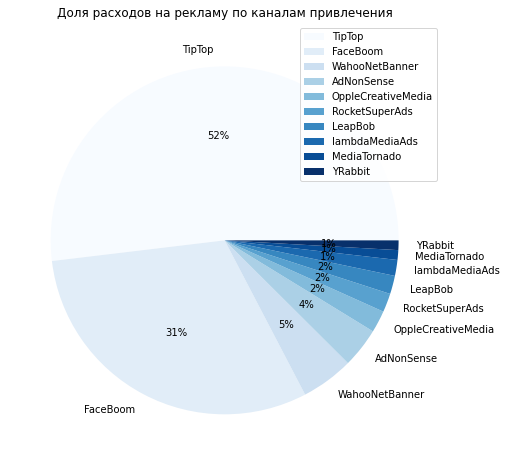

In [36]:
fig, ax = plt.subplots(figsize=(19, 8))
channel_costs['costs'].plot(kind='pie', cmap="Blues", legend=True, autopct='%.0f%%')
plt.title(f'Доля расходов на рекламу по каналам привлечения')
ax.set_ylabel(None);

Видим, что наибольшие расходы приходятся на TipTop и FaceBoom, чем кстати и объясняется рост привеченных пользователей по этим каналам, суммарно в них было вложено 83% общих трат на рекламу. Аутсайдеры по вложениям MediaTornado и YRabbit, на них менее 1% затрат на каждого.

Далее рассмотрим изменение затрат по времени.

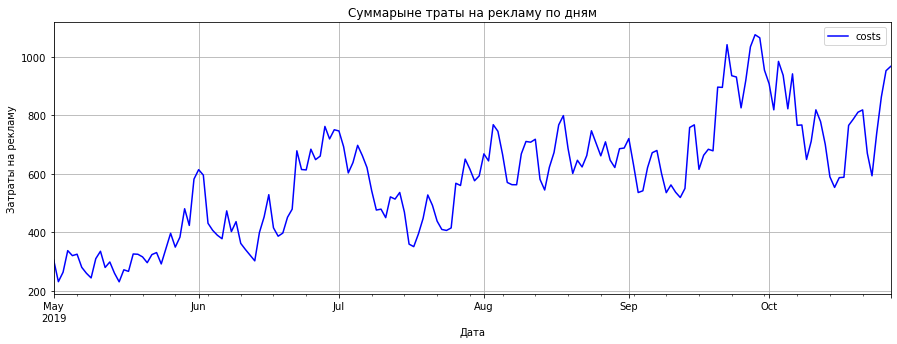

In [37]:
costs.pivot_table(index='dt', values='costs', aggfunc='sum').reset_index().plot(x='dt', y='costs', figsize=(15, 5), grid=True, colormap="winter");
plt.xlabel('Дата')
plt.ylabel('Затраты на рекламу')
plt.title(f'Суммарыне траты на рекламу по дням');

По графику видно, что суммарные затраты на рекламу постепенно растут, максимум затрат пришлось на конец сентября, минимальными были в начале мая. 

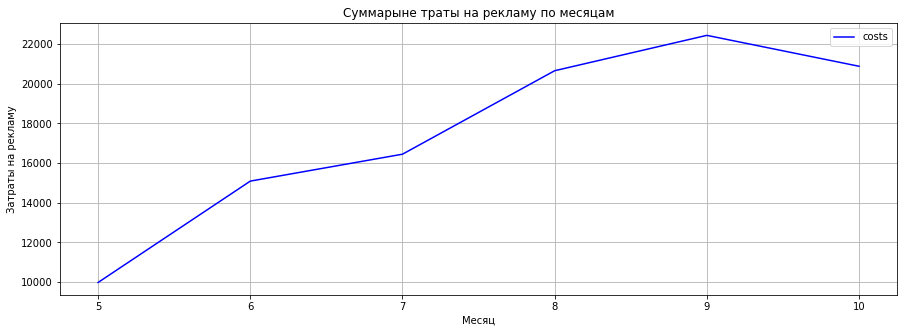

In [38]:
costs['month'] = costs['dt'].dt.month
costs.pivot_table(index='month', values='costs', aggfunc='sum').reset_index().plot(x='month', y='costs', figsize=(15, 5), grid=True, colormap="winter");
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.title(f'Суммарыне траты на рекламу по месяцам');

На укрупненном до месяца графике также хорошо виден рост затрат и максимум в сентябре, идет незначительное снижение в октябре, но нет данных за несколько последних дней, так что, возможно, уровень останется неизменным.

Посмотрим на затраты на рекламу в разрезе каналов привлечения и по времени:

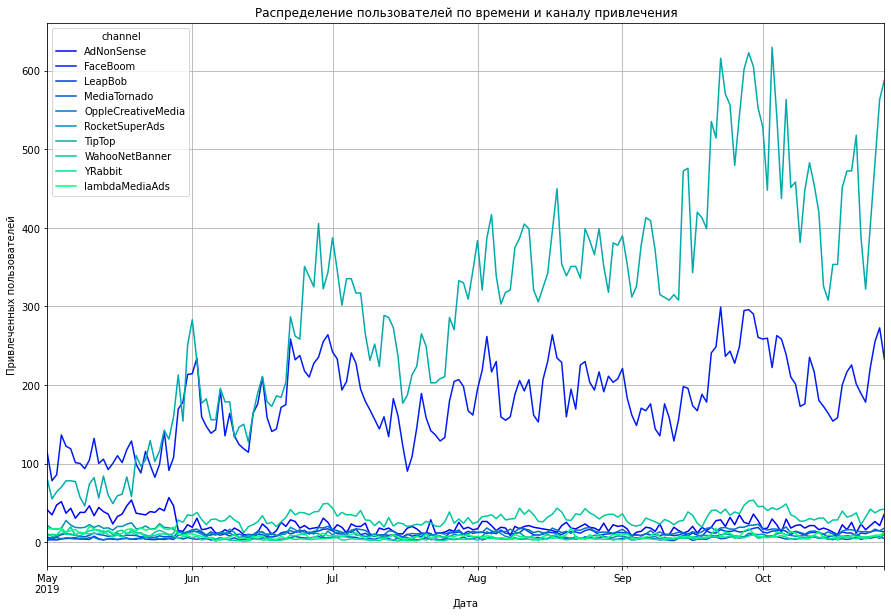

In [39]:
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(figsize=(15, 10), grid=True, colormap="winter");
plt.xlabel('Дата')
plt.ylabel('Привлеченных пользователей')
plt.title(f'Распределение пользователей по времени и каналу привлечения');

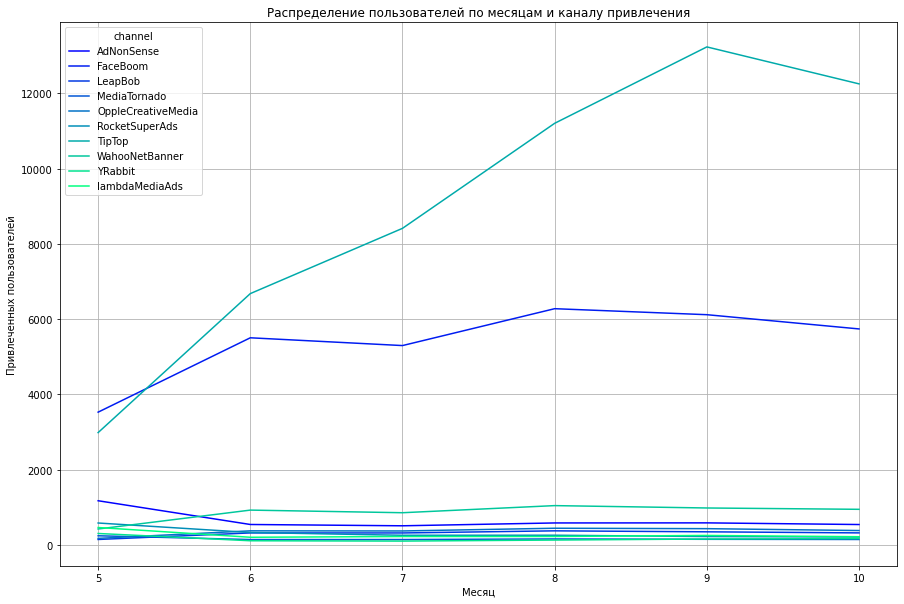

In [40]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(figsize=(15, 10), grid=True, colormap="winter");
plt.xlabel('Месяц')
plt.ylabel('Привлеченных пользователей')
plt.title(f'Распределение пользователей по месяцам и каналу привлечения');

В целом тендцию видно, но на плтаформах кроме TipTop и FaceBoom плохо понятно, что происходит из-за масштаба, посмотрим еще отдельно на малобюджетные каналы:

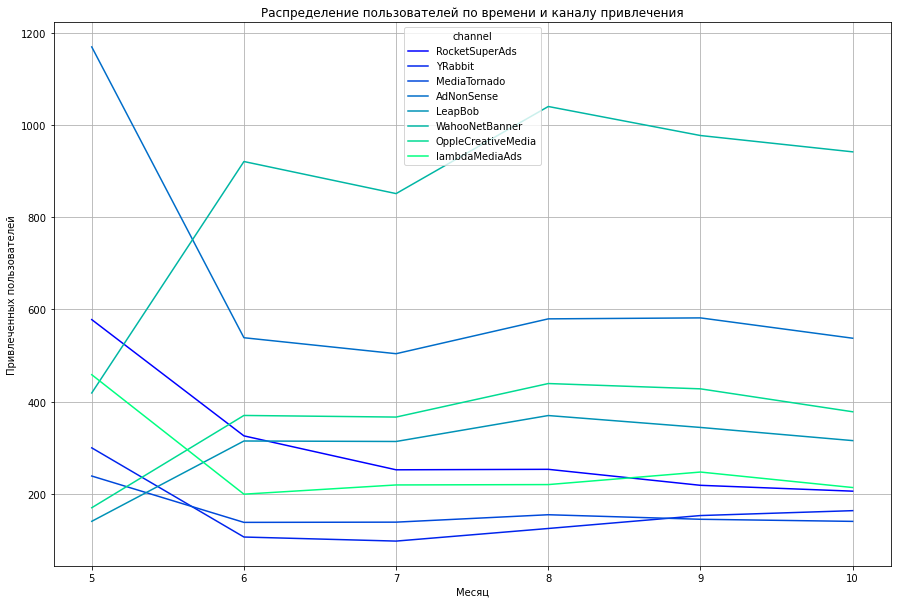

In [41]:
costs_8 = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_8 = costs_8[[ 'RocketSuperAds', 'YRabbit', 
                   'MediaTornado', 'AdNonSense' ,
                   'LeapBob', 'WahooNetBanner' ,
                   'OppleCreativeMedia', 'lambdaMediaAds']]
costs_8.plot(figsize=(15, 10), grid=True, colormap="winter");
plt.xlabel('Месяц')
plt.ylabel('Привлеченных пользователей')
plt.title(f'Распределение пользователей по времени и каналу привлечения');

Теперь можно подвести общий итог: значительнее всего затраты выросли на канал TipTop, здесь они самые высокие и возрастающие. Затраты на FaceBoom были изначально поменьше, и выросли не так значительно к концу периода, в целом были весьма стабильными. По остальным 8 каналам примерно одинаковые относительно стабильные затраты, рост по WahooNetBanner среди них наиболее выраженный, а наиболее выраженное падение произошло у AdNoneSense в июне.

### Расчет стоимости привлечения одного покупателя из каждого источника

Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей:

In [42]:
profiles['acquisition_cost'].describe()

count    150007.000000
mean          0.703283
std           0.954100
min           0.000000
25%           0.000000
50%           0.247500
75%           1.108943
max           3.715385
Name: acquisition_cost, dtype: float64

Средняя стоимость привлечения на одного пользователя составляет округленно 0,7$, медианное значение при этом - 0,24, скорее всего смещение происходит за счет органического трафика, стоимость привлечения котрого равна 0. Посмотрим еще дополнительно без органического трафика.

In [43]:
profiles.query('channel!="organic"')['acquisition_cost'].describe()

count    93568.000000
mean         1.127493
std          0.990504
min          0.124615
25%          0.257143
50%          1.080531
75%          1.128571
max          3.715385
Name: acquisition_cost, dtype: float64

Без учета "бесплатных" пользователей среднее составляет 1,1$, медиана - 1,08. Что очень близко, значит выбросов не много. Думаю, что данный показатель дает более адекватную оценку стоимости привлечения.

Также рассмотрим САС по каждому каналу рекламы:

In [44]:
cac = profiles.query('channel!="organic"').pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
cac['acquisition_cost'] = round(cac['acquisition_cost'],2)
cac = cac.sort_values(by='acquisition_cost', ascending=False).reset_index()
cac

,channel,acquisition_cost
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,MediaTornado,0.22
8,YRabbit,0.22
9,LeapBob,0.21


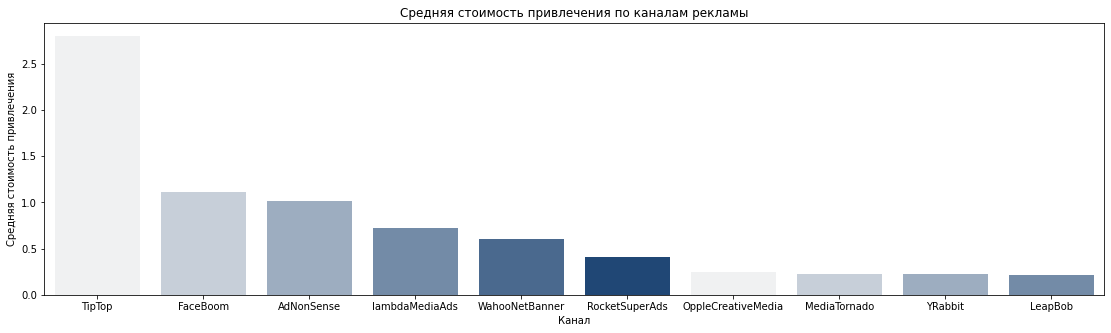

In [45]:
pal = sns.color_palette("light:#124683")
plt.figure(figsize=(19, 5))
sns.barplot(data= cac, x='channel', y='acquisition_cost', palette=pal)
plt.xlabel('Канал')
plt.ylabel('Средняя стоимость привлечения')
plt.title(f'Средняя стоимость привлечения по каналам рекламы');

Из полученных данных видим, что самый дорогой трафик из канала TipTop - 2,8 это более, чем в два раза дороже, чем следуюший по стоимости FaceBoom(1,11). Самый дешевый трафик от MediaTornado, YRabbit,	LeapBob - не более 0,22 за пользователя.

### Вывод

<div style="border:solid SandyBrown 2px; padding: 20px">  

* Общие затраты на рекламу за указанный период составили 105 947. 
* Наибольшие расходы приходятся на TipTop и FaceBoom, суммарно на них приходится 83% общих затрат на рекламу. 
* Cуммарные затраты на рекламу постепенно растут, максимум затрат пришлось на конец сентября, минимальными были в начале мая. 
* Значительнее всего затраты выросли на канал TipTop, затраты на FaceBoom были изначально поменьше, и выросли не так значительно к концу периода. По остальным 8 каналам примерно одинаковые относительно стабильные низкие затраты. 
* Без учета органического трафика САС составляет 1,1$. Самый дорогой трафик из канала TipTop - 2,8, самый дешевый трафик от MediaTornado, YRabbit, LeapBob - не более 0,22 за пользователя.

## Оценка окупаемости рекламы для привлечения пользователей

### Анализ общей окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Вызовем функции описанные в разделе 3, результатом вызова функции станут:
* кривые LTV,
* кривые ROI,
* график истории изменений LTV,
* график истории изменений ROI,
* график истории изменений CAC.  
Графики, отражающие динамику метрик, сгладим функцией filter_data()

Пользователей пришедших из органического канала не будем брать в расчет, тк данное исселдование в первую очередь ставит целью анализ затрат на каналы рекламы и их оптимизацию.

In [46]:
profiles = profiles.query('channel != "organic"')

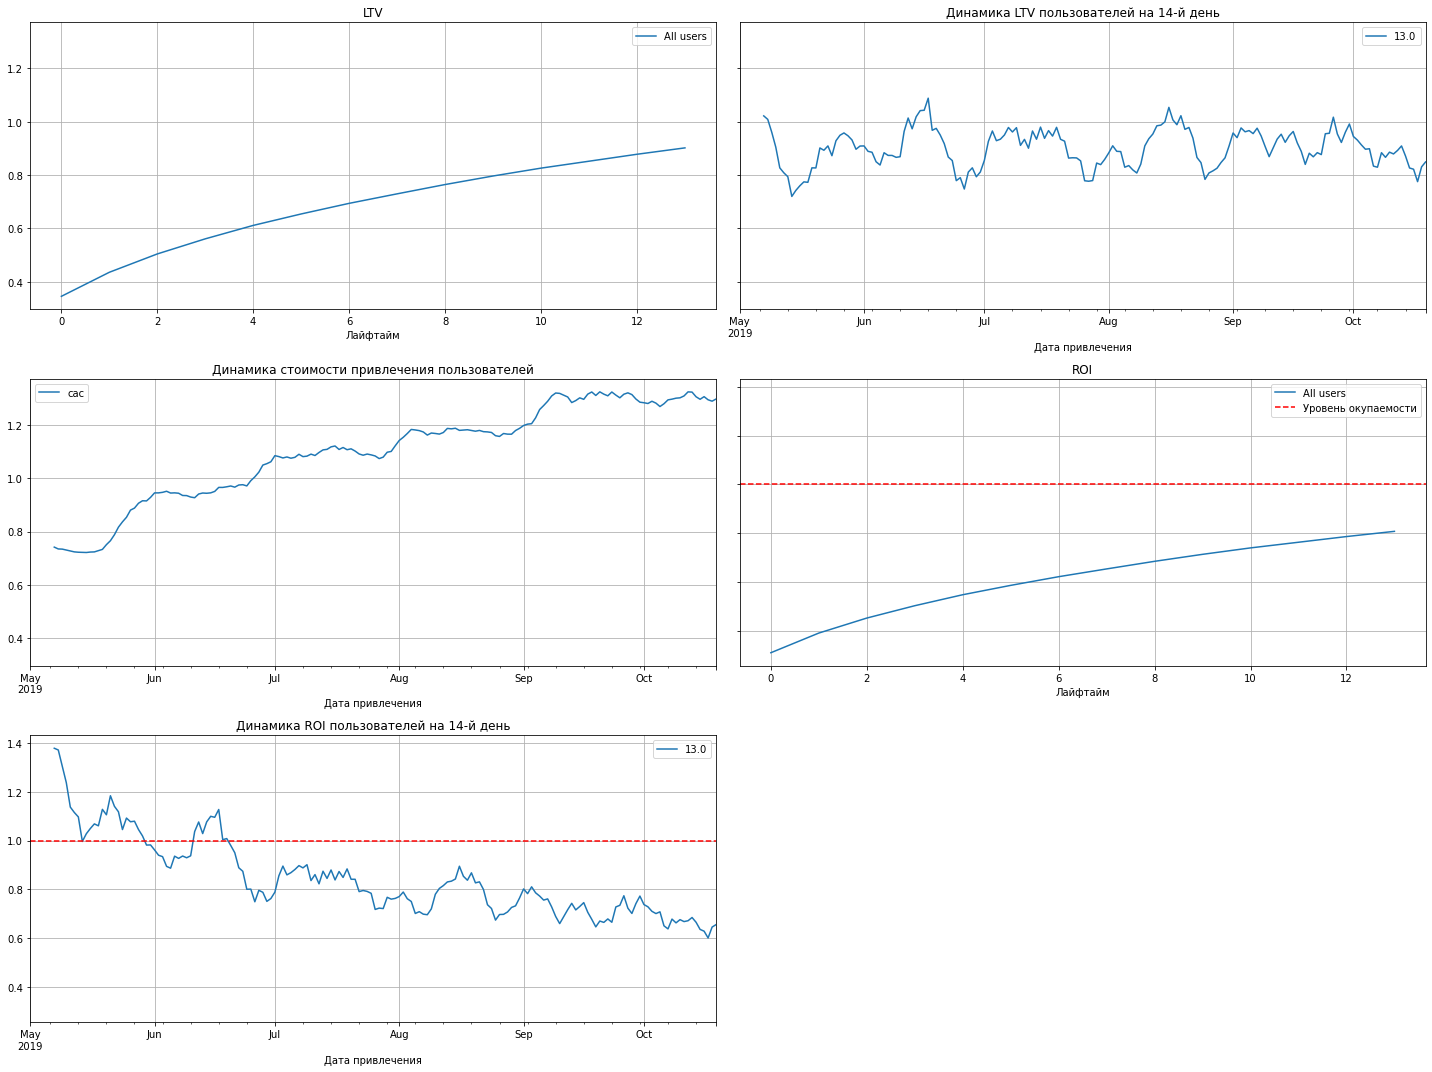

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Из построенных графиков видим, что реклама не окупается к 14 дню, ROI — чуть больше 80%. Стоимость привлечения увеличивается с течением времени и САС ощутимо вырос с мая. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. 
ROI пользователей падает, он снизился примерно вдвое за анализируемый период. Действительно, по имеющейся информации несколько прошлых месяцев бизнес постоянно нес убытки, и как видно из графиков, реклама не окупается с июля стабильно. Осталось разобраться поподробнее в причинах.

### Анализ окупаемости рекламы с разбивкой по устройствам

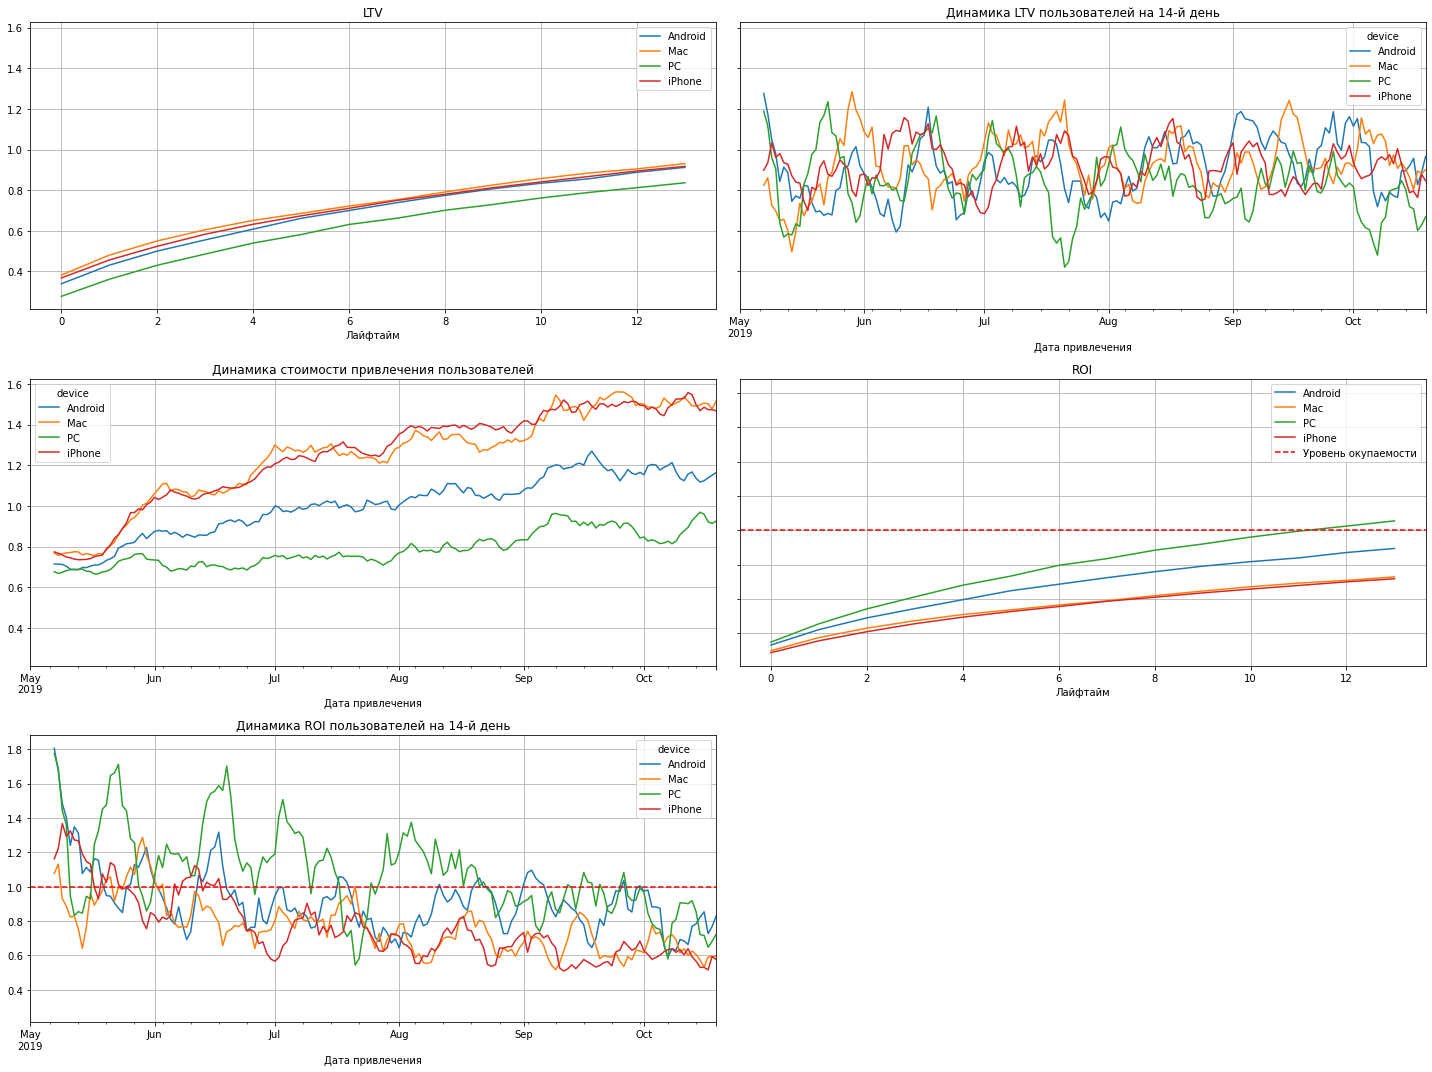

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Из графиков видим, что стоимость привлечения растет для всех устройств, а больше всего для Mac и iPhone. LTV пользователей подвержен сезонности, но стабилен. Реклама окупается только для PC и то лишь на 11 день, видимо по большей части за счет низкой стоимости рекламы, показатели ROI для iPhone и Mac самые низкие при самой высокой цене привлечения. В целом динамика ROI далеко не идеальная, видим, что с июля по каждому устройству реклама не окупалась.


### Анализ окупаемости рекламы с разбивкой по странам

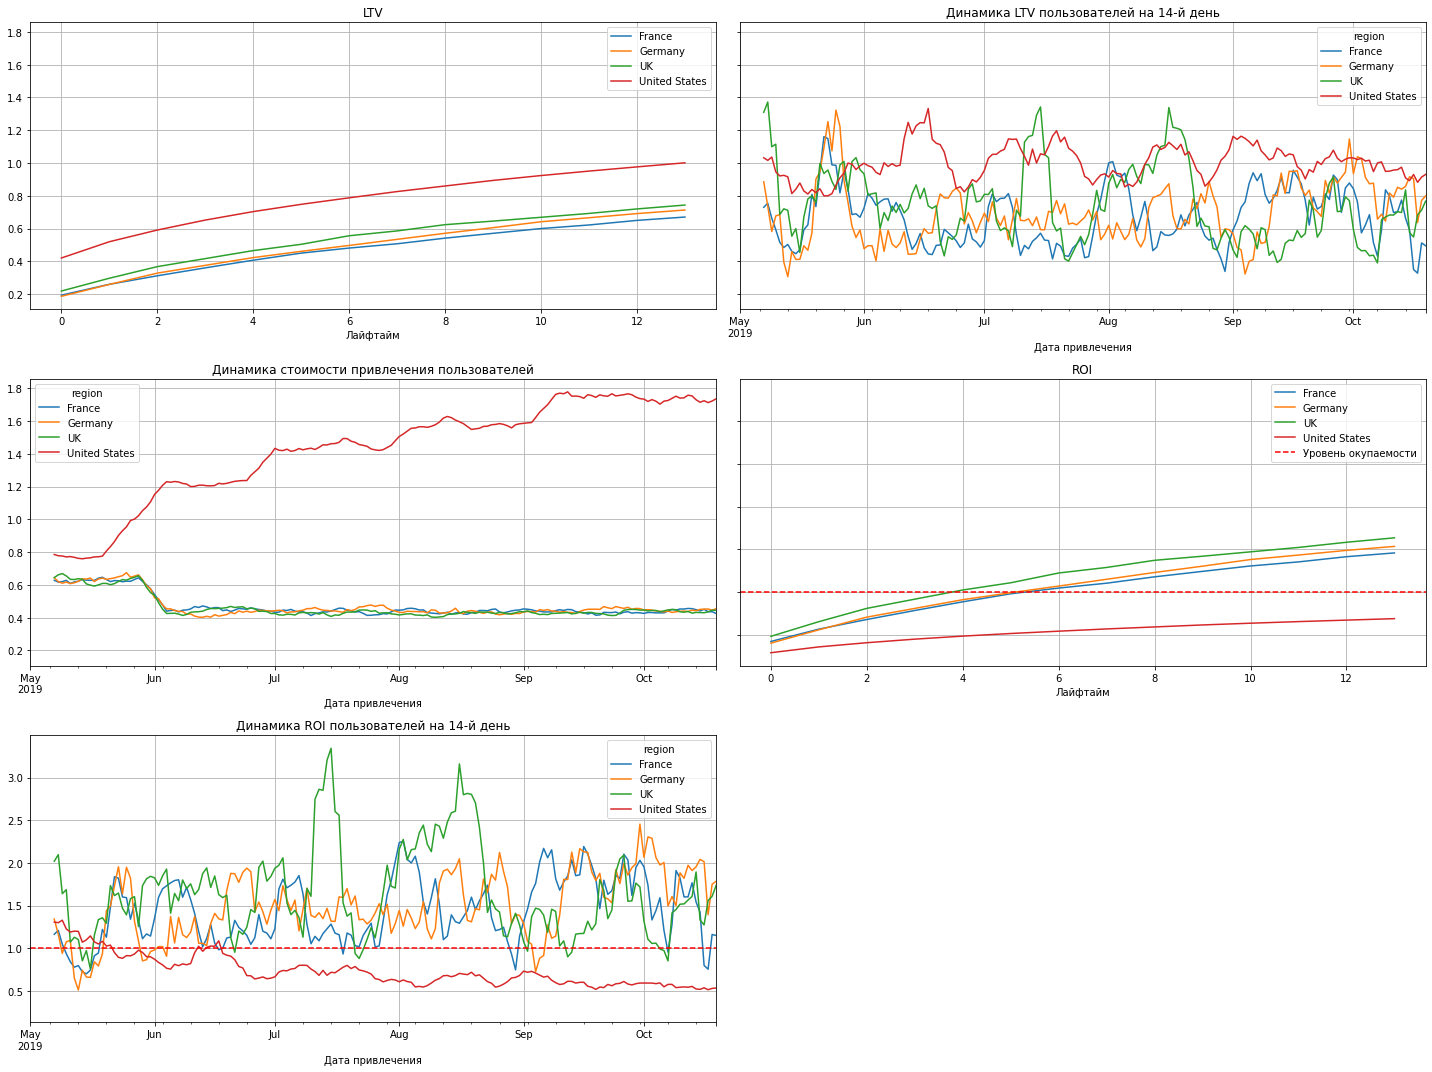

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Картина по странам в целом нелохая, самый высокий LTV в США, но при этом стоимость привлечения данных пользоватаелей несоизмеримо выше, в результате это единственная страна, в которой затраты на привлечение не окупаются на 14ый день, тк затраты выросли в разы с мая. Великобритания лидирует по окупаемости, выходит на необходимый уровень с 4го дня.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Для того, чтобы получить более наглядные данные по графикам предлагаю разделить каналы привлечения на 2 группы, по 5 каналов в каждой.


In [50]:
profiles1 = profiles.query('channel in ["FaceBoom", "MediaTornado", "RocketSuperAds", "TipTop", "YRabbit"]')

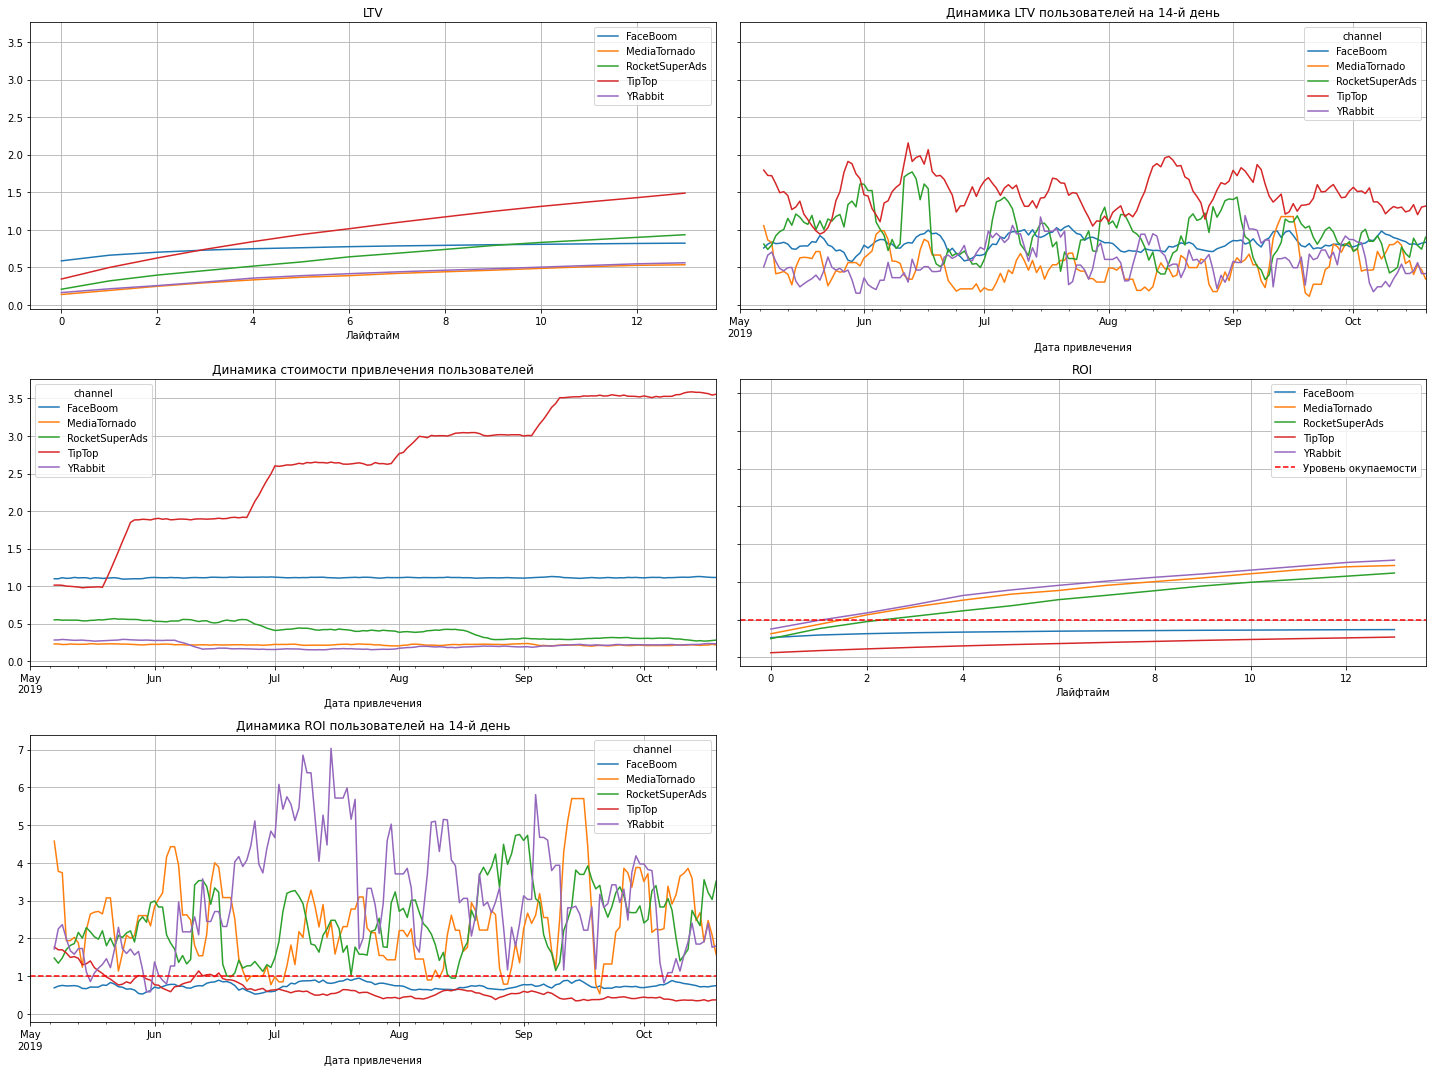

In [51]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles1,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

In [52]:
profiles2 = profiles.query('channel in ["AdNonSense", "LeapBob", "OppleCreativeMedia", "WahooNetBanner", "lambdaMediaAds"]')                          

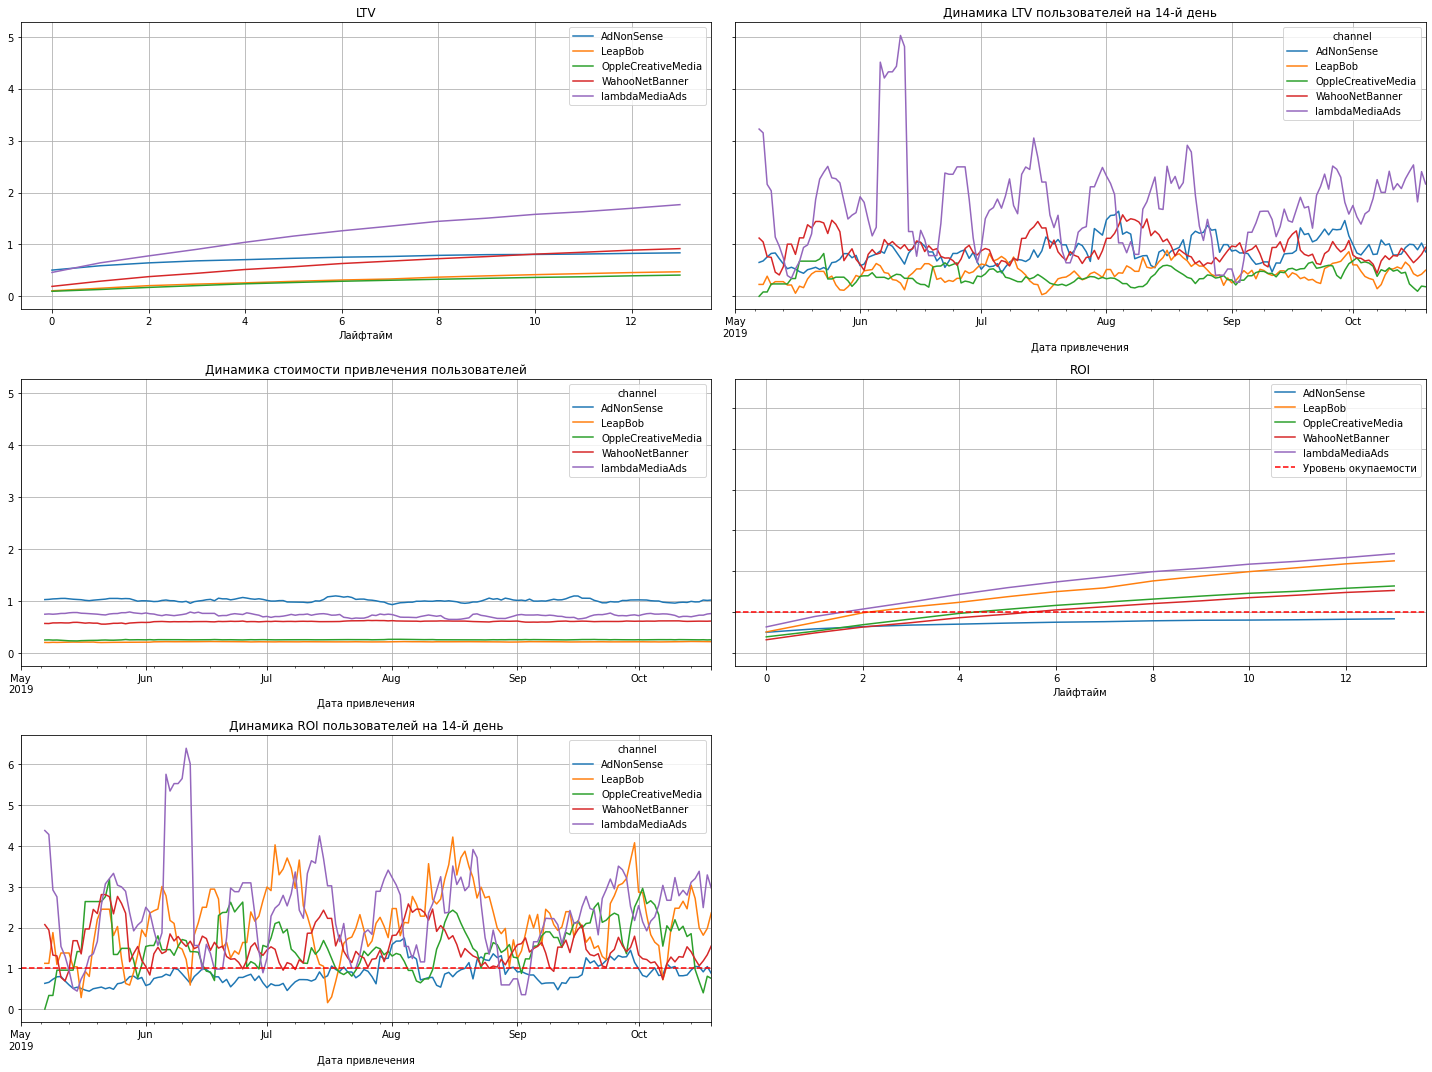

In [53]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

На общем фоне очень сильно выделяется рекламный канал TipTop. Стоимость привлечения пользователей выросла в более, чем 3 раза. Скорее всего изначально канал показывал хорошие показатели и на него сделали ставку, которая не оправдалась и вложенные средства не окупились. Также убыточным стал канал FaceBoom. При этом из анализа в пункте 4.2 следует, что эти два канала являются основными по привлечению пользователей. Не окупаются также и пользователи привлеченные из канала AdNonSense.

### Вывод

<div style="border:solid SandyBrown 2px; padding: 20px">  
В целом, реклама не окупается и не выходит на необходимый уровень на 14ый день. Основные проблемы среди пользователей Mac и iPhone, в регионе США и по каналам привлечения AdNonSense, FaceBoom, TipTop. Предположительно, рекламный бюджет был нерационально распределен и слишком большие затраты по перечисленным направлениям не принесли необходимую прибыль для выхода на рентабельность. С учетом того, что это в то же время по заданным параметрам самые большие показатели привлечения, общий уровень окупаемость "страдает" именно из-за них. В остальных категориях ситуация вполне удовлетворительная. Показатель LTV также имеет относительную стабильность и не вызывает вопросов.

## Анализ конверсии и удержания

Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам. Для этого воспользуемся функциями, описанными в пункте 3.

### Анализ конверсии и удержания в зависимости от устройства

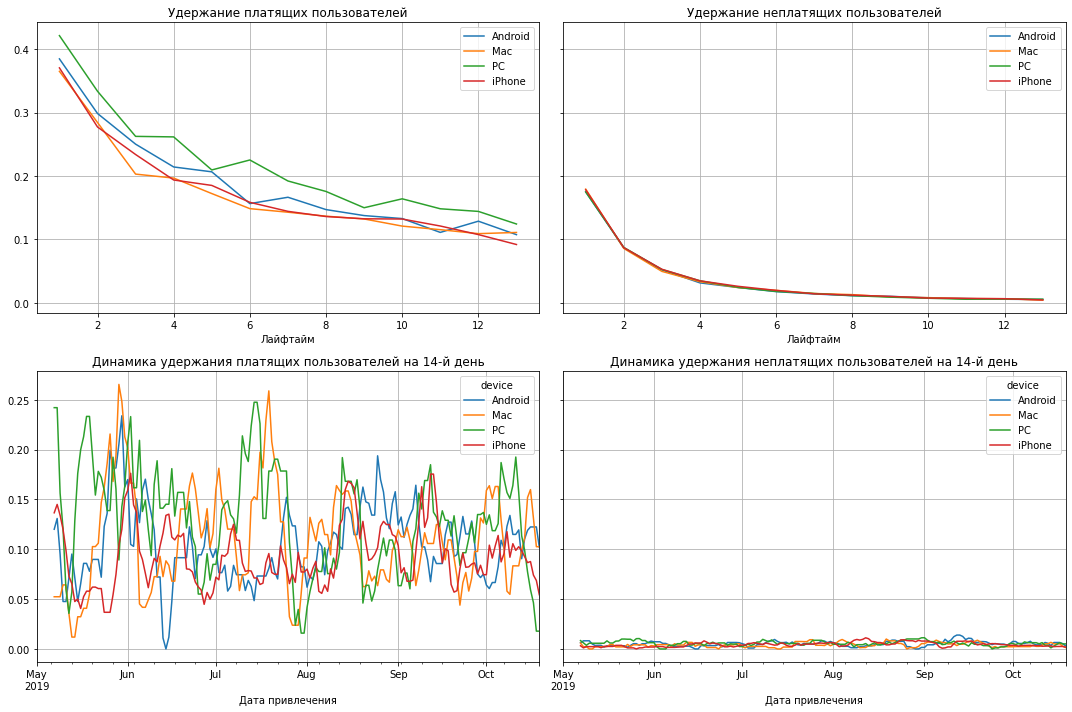

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание неплатящих пользователей всех устройств примерно одинаковое. Среди платящих пользователей нет критичных отличий, тем не менее пользователи PC имеют лучший показатель, а худший у владельцев iPhone и Mac.

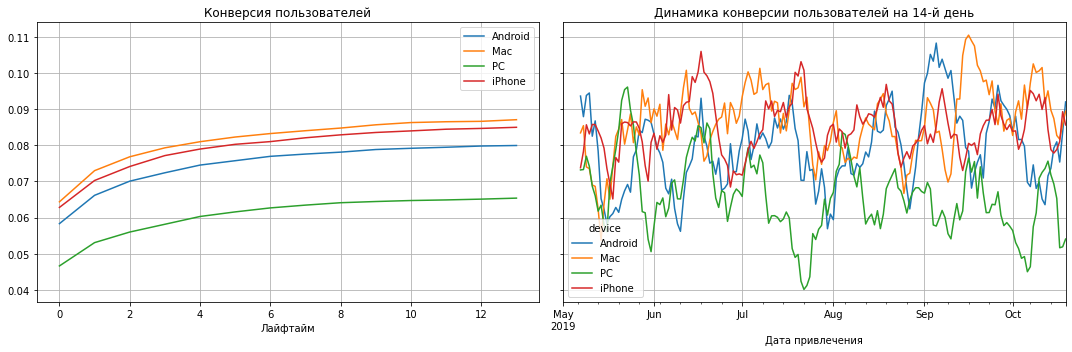

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия же Mac и iPhone выше, чем на остальных устройствах и стабильнее. Самую низкую показывают PC, она же и самая нестабильная, явно выше, чем остальные подвержена сезонности.

### Анализ конверсии и удержания в зависимости от страны

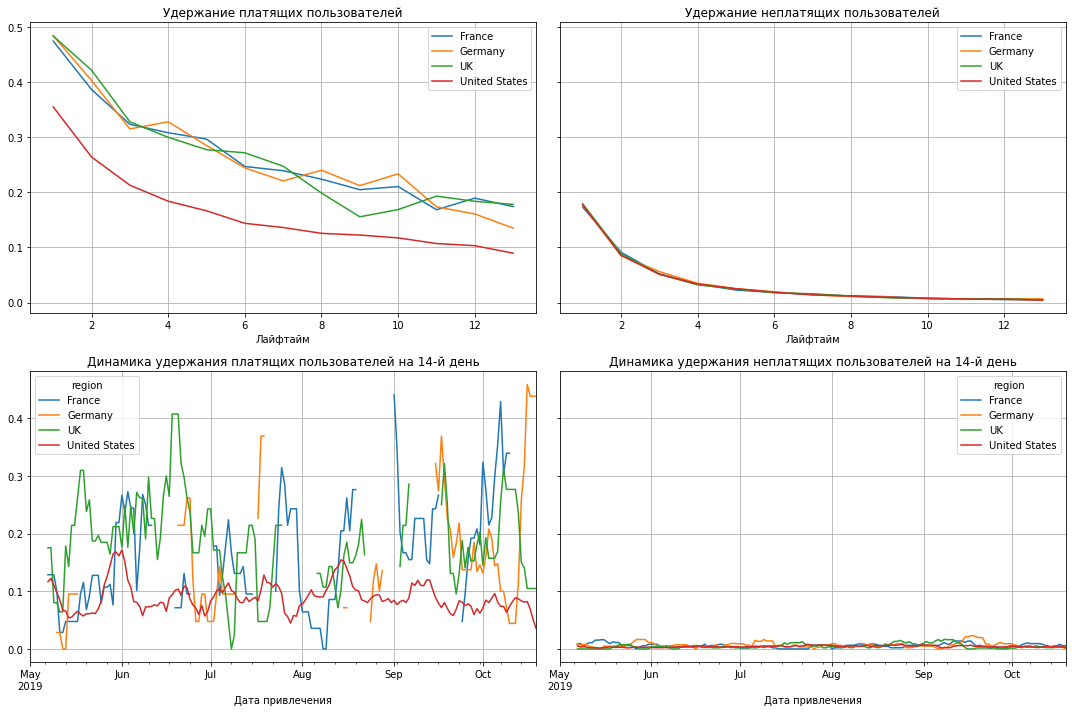

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Германия, Франция и Великобритания показывают не очень стабильное, но хорошее удержание. А вот пользователи из США более стабильны, но стабильны не в лучшую сторону, их удержание в среднем на 10%, ниже, чем у остальных пользовтаелей в аналогичный лайфтайм. Разрывы на некоторых графиках скорее всего связаны с тем, что в какие-то даты из данных стран не регистрировались пользователи. В таком случае можно сказать, что приток новых пользователей наиболее стабилен в Великобритании и США и менее стабилен в Германии и Франции.

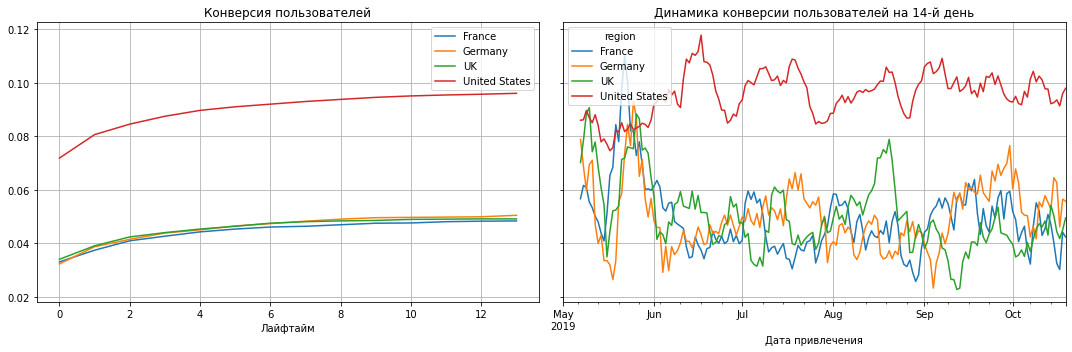

In [57]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США значительно выше конверсии в остальных странах. Германия, Великобритания и Франция находятся примерно на одном уровне по данному показателю.

### Анализ конверсии и удержания в зависимости от рекламного канала

Для анализа каналы также разделим на 2 группы как в прошлых пунктах, чтобы не запутаться с графиками.

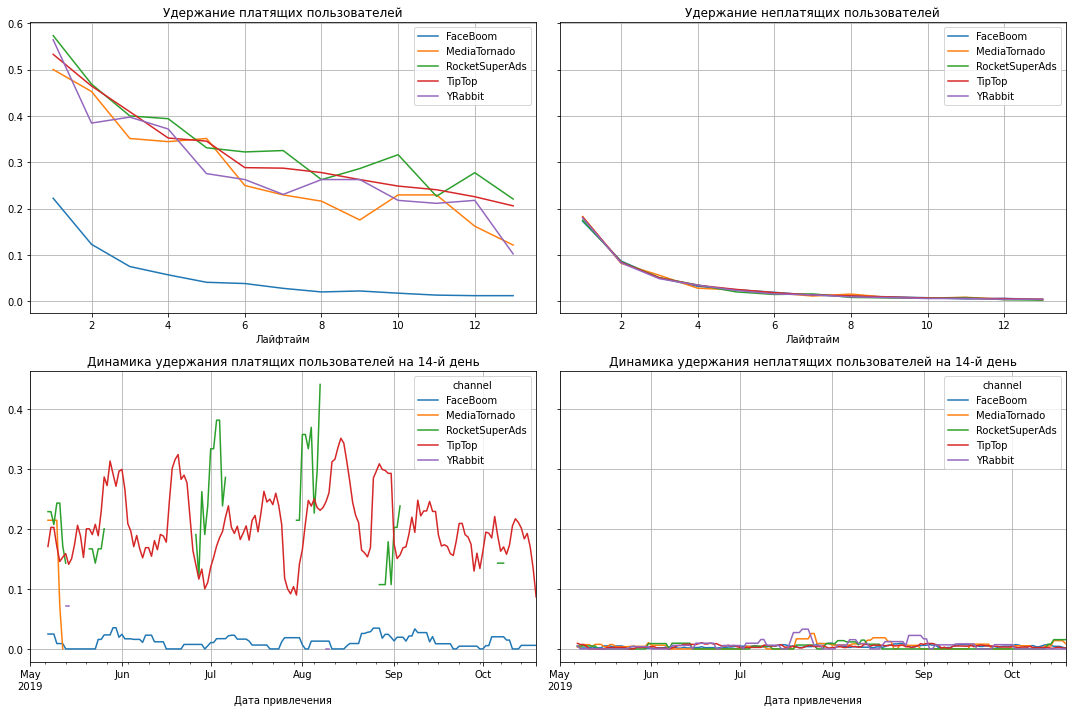

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

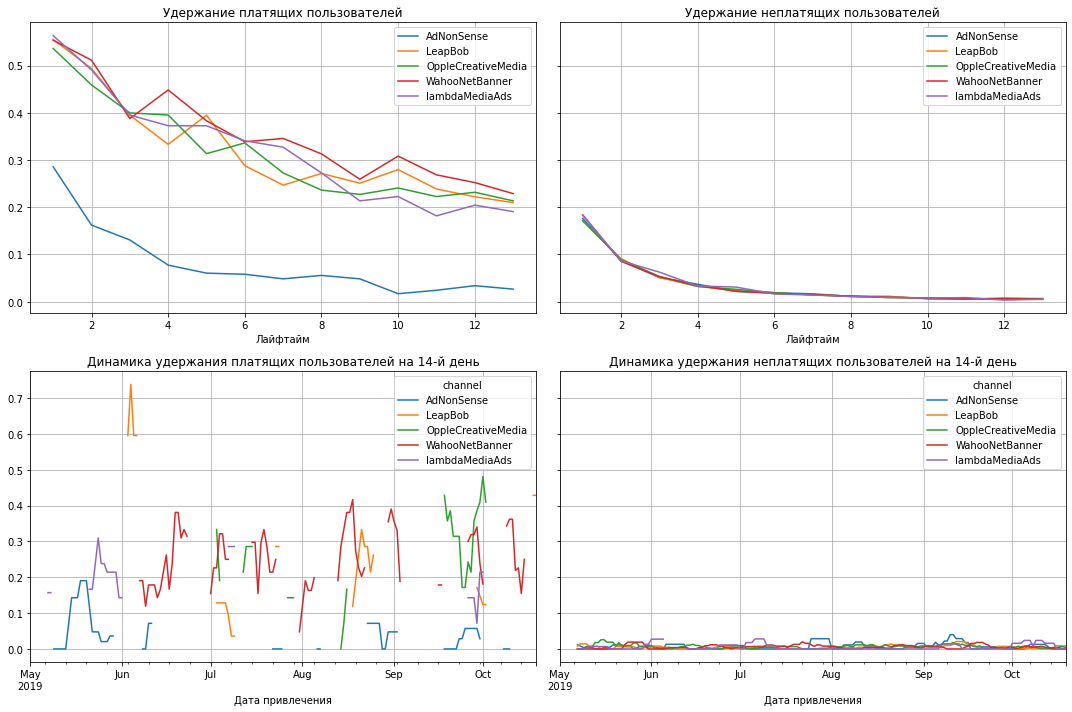

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Среди неплатящих пользователей всех каналов удержание и данимика без каких-либо отклонений. А вот среди платящих отчетливо выделяются AdNinSense и FaceBoom. Их удержание значительно ниже остальных рекламных каналов. У AdNonSense, судя по всему, еще и проблемы со стабильностью притока пользовтаелей, а вот от FaceBoom приток стабильный, но удержание очень низкое буквально с первого дня.

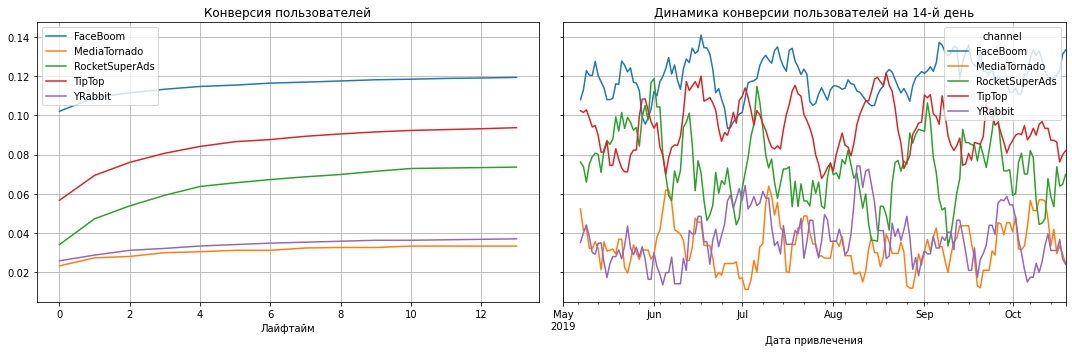

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

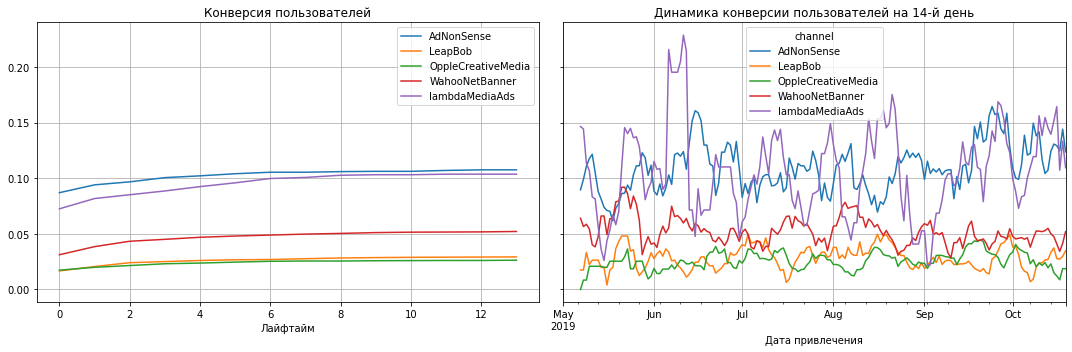

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles2, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

При этом у тех же каналов самая высокая конверсия. Динамика же по всем каналам примерно одинаковая и выглядит нормально.

### Вывод

<div style="border:solid SandyBrown 2px; padding: 20px"> 
    
Неплатящие пользователи по всем разбивкам показывают примерно похожие невысокие результаты конверсии и удержания. По платящим пользователем есть проблемные места:    
1. Низкая по сравнению  остальными устройствами конверсия у PC.      
2. Низкое удержание при выскоой конверсии у пользователей из США.    
3. Нестабильный приток пользователей из остальных стран.    
4. Крайне низкое удержание пользвоателей из канала FaceBoom и AdNonSense, сравнимое с удержанием неплатящих пользователей.   
5. Нестабильный приток пользователей из всех каналов кроме TipTop и FaceBoom.  

## Общий вывод

В результате работы были рассмотрены данные с логами сервера о посещениях развлекательного приложения Procrastinate Pro+ новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.

В данных не содержалось дубликатов или пропусков, была проведена минимальная предобработка.

В результате имеющихся данных были составлены профили пользователей а также составлена картина пользователей по странам, каналам привлечения и устройствам: 

* канал organic привел в приложение больше всего пользователей, в то же время из них было меньше всего платящих, всего 2,1%.
В дальнейшем исследовании данный трафик не учитывался
* среди остальных источников лидирует FaceBoom, вместе с TipTop они принесли приложению 61% платящих пользователей
* основная аудитория нашего приложения это пользователи из США
* по устройству лидирующее положение среди плательщиков занимают iPhone, а относительно привлеченных пользователей наибольшую конверсию в покупку дают пользователи Mac.

Также была проведена оценка маркетинговых затрат в общем и по каналам привлечения:

* общие затраты на рекламу за указанный период составили 105 947
* наибольшие расходы приходятся на TipTop и FaceBoom, суммарно на них приходится 83% общих затрат на рекламу
* затраты на рекламу постепенно растут, максимум затрат пришлось на конец сентября, минимальными были в начале мая
* значительнее всего затраты выросли на канал TipTop
* самый дорогой трафик из канала TipTop - 2,8, самый дешевый трафик от MediaTornado, YRabbit, LeapBob - не более 0,22 за пользователя.

Анализ окупаемости рекламы и привлечения пользователей дал следующие результаты:

* реклама приложения не окупается и не выходит на необходимый уровень на 14ый день 
* основные проблемы среди пользователей Mac и iPhone, в регионе США и по каналам привлечения AdNonSense, FaceBoom, TipTop. 
* скорее всего рекламный бюджет был нерационально распределен и слишком большие затраты по перечисленным направлениям не принесли необходимую прибыль для выхода на рентабельность.

Анализ конверсии и удержания выявил следующее:

* низкое удержание при высокой конверсии у пользователей из США.
* крайне низкое удержание пользователей из канала FaceBoom и AdNonSense, сравнимое с удержанием неплатящих пользователей.

Таким образом основные проблемы, на которые следует обратить внимание:

* нерациональные траты рекламного бюджета
* низкие показатели удержания по части каналов и аудитории из США
* неокупаемость рекламных затрат.

Рекомендации отделу маркетинга:

* рассмотреть возможность расширения рекламы среди пользователей Великобритании, Германии и Франции, при этом пересмотреть затраты на рекламу в США. 
* переструктруировать рекламу по каналам, по возможности, часть средств направляемых на TipTop, направлять на более "дешевые" каналы, такие как RocketSuperAds и LambdaMediaAds.
* разобраться подробнее с пользователями, которые приходят из каналов AdNonSense и FaceBoom, выяснить причины крайне низких показателей удержания, почти 80% пользователей уходят из приложения в первый же день. Возможно, они сталкиваются с какими-то техническими проблемами или выходило какое-то неудачное обновление. В любом случае необходимо разбираться на уровне конкретных когорт пользователей
* аналогично для пользователей из США, которые пользуются Mac и iPhone. Возможно, данные пользователи испытывают проблемы с оплатами в приложении или продления подписки. Если проблем нет, стоит рассмотреть какие-то активности для удержания пользователей.